<a href="https://colab.research.google.com/github/ivsantiagocz/Entrega-2/blob/main/PrincipioBabinet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, ifft2 
import cv2

In [ ]:
#Definiciòn de distintos circulos para crear màscaras en forma de donas
def cmask1(radius,N):
  t, s = np.ogrid[0:N,0:N]
  mask1 = (t-N/2)**2 + (s-N/2)**2 <= radius*radius
  array1 = np.ones((N,N), np.uint8)
  array1[mask1] = 0
  return array1

def icmask1(radius,N):
   t, s = np.ogrid[0:N,0:N]
   mask3 = (t-N/2)**2 + (s-N/2)**2 <= radius*radius
   array3 = np.zeros((N,N), np.uint8)
   array3[mask3] = 1
   return array3

def cmask2(radius,N):
  t, s = np.ogrid[0:N,0:N]
  mask2 = (t-N/2)**2 + (s-N/2)**2 <= radius*radius
  array2= np.zeros((N,N), np.uint8)
  array2[mask2]=1
  return array2

def icmask2(radius,N):
   t, s = np.ogrid[0:N,0:N]
   mask4 = (t-N/2)**2 + (s-N/2)**2 <= radius*radius
   array4 = np.ones((N,N), np.uint8)
   array4[mask4] =1
   return array4

In [ ]:
longitud= 633e-6 #longitud de onda rojo
L= 5 #medida en milimetros del objeto
N= 1024  #numero de pixeles
dx= (L/N) #tamaño de pixel
iradio=2 #radio circulo mayo
radio = 0.5 #radio circulo menor
z=((N*(dx**2))/longitud)-1 #distancia de propagaciòn

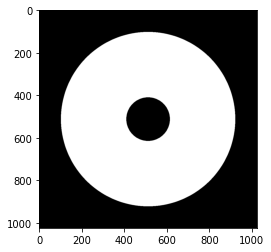

In [ ]:
Ut= np.zeros((N,N))*np.exp(-1j*0)  #matriz de ceros para rellenar 
ut= cmask1(radio/dx,N)*icmask1(iradio/dx,N)#màscara dona, puede cambiarse por lo que se desee
hh= np.zeros((N,N))*np.exp(-1j*0) #matriz de ceros para rellenar
plt.imshow(ut,cmap='gray') #mostrar primera transmitancia

plt.show()

In [ ]:
k=(2*np.pi)/longitud # vector de onda

In [ ]:
df=1/(dx*N) #divisiòn frecuencias

In [ ]:
for t in range(int(-N/2),int(N/2)): # generar la funciòn transferencia 
            for s in range(int(-N/2),int(N/2)):
                h= np.exp(1j*z*k*np.sqrt(1-((longitud*df)**2)*((t**2) + (s**2))))
                hh[t,s]=h 

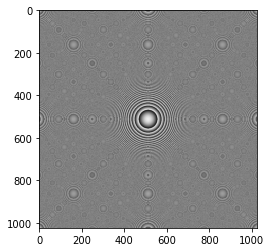

In [ ]:
hh=np.fft.fftshift(hh)
uf=np.fft.fft2(ut)#transformada de fourier del campo de entrada
uf=np.fft.fftshift(uf)
Ut=uf*hh            
Uf=np.fft.ifft2(Ut)
U=abs(Uf*Uf) #irradiancia
plt.imshow(np.angle(hh),cmap='gray') #funciòn de transferencia generada con las condiciones del sistema

plt.show()


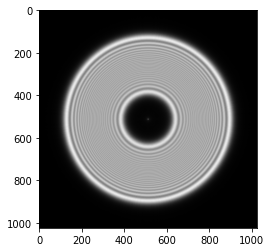

In [ ]:
plt.imshow(U,cmap='gray') #irradiancia difracciòn primera transmitancia

plt.show()


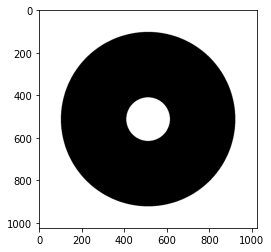

In [ ]:
ut2= cmask2(radio/dx,N)*icmask2(iradio/dx,N)#màscara dona, puede cambiarse por lo que se desee
Uones=np.ones((N,N)) #matriz de unos
ut2=Uones-ut  #resta de la segunda màscara y la matriz de unos para obtener la segunda dona
plt.imshow(ut2,cmap='gray') #segunda transmitancia

plt.show()


In [ ]:
uf2=np.fft.fft2(ut2)#transformada de fourier del campo de entrada
uf2=np.fft.fftshift(uf2)
Ut2=uf2*hh            
Uf2=np.fft.ifft2(Ut2)
U2=abs(Uf2*Uf2) 

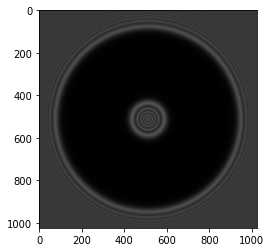

In [ ]:
plt.imshow(U2,cmap='gray') ##irradiancia difracciòn segunda transmitancia

plt.show()

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


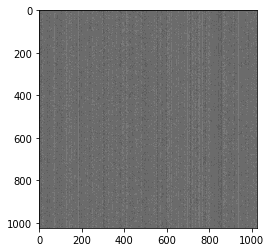

In [ ]:
Suma=Uf+Uf2 #suma patrones de difracciòn
I= abs (Suma**2) #irradiancia de la suma
print(I)
plt.imshow(I,cmap='gray') #irradiancia de la suma

plt.show()

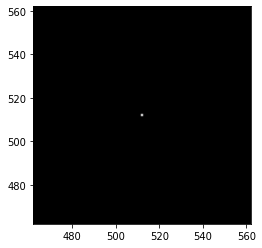

In [ ]:
#calculo de la transformada inversa de la irradiancia para comprobar que es una onda plana
F=np.fft.fft2(I)
F=np.fft.fftshift(F)
F2=abs(F*F)
zoom=50
plt.figure(figsize=(7,4))
plt.xlim((N/2)-zoom,(N/2)+zoom)
plt.ylim((N/2)-zoom,(N/2)+zoom)
plt.imshow(F2,cmap='gray')

plt.show()


[[ 2.22044605e-16  1.11022302e-16  1.11022302e-16 ... -1.11022302e-16
   1.11022302e-16 -1.11022302e-16]
 [-1.11022302e-16 -1.11022302e-16  2.22044605e-16 ... -1.11022302e-16
   1.11022302e-16 -1.11022302e-16]
 [ 1.11022302e-16 -5.55111512e-16 -3.33066907e-16 ...  1.11022302e-16
  -1.11022302e-16 -3.33066907e-16]
 ...
 [ 2.22044605e-16  1.11022302e-16  0.00000000e+00 ... -5.55111512e-16
  -1.11022302e-16 -3.33066907e-16]
 [ 0.00000000e+00 -1.11022302e-16 -3.33066907e-16 ...  0.00000000e+00
   0.00000000e+00 -3.33066907e-16]
 [-1.11022302e-16  0.00000000e+00  2.22044605e-16 ... -1.11022302e-16
   0.00000000e+00  0.00000000e+00]]
1.2212453270876722e-15


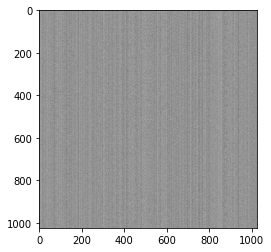

In [ ]:
#propagaciòn de la onda en la ausencia de ambas màscaras
ufunos=np.fft.fft2(unos)#transformada de fourier del campo de entrada
ufunos=np.fft.fftshift(ufunos)
Utunos=ufunos*hh            
Ufunos=np.fft.ifft2(Utunos)
Uunos=abs(Ufunos*Ufunos) 

#comparaciòn del resultado obtenido con el que se esperaba obtener 
resta2=Uunos-I
print(resta2)
print(np.max(abs(resta2))) #mayor diferencia entre ambas matrices, lo que nos da una idea del margen de error 
plt.imshow(resta2,cmap='gray')

plt.show()